<a href="https://colab.research.google.com/github/LeoMcBills/ML-Algo-Exploration/blob/main/carPred_mbubesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

**Data Preparation**

In [2]:
data = pd.read_csv("train.csv", ",")
data.head

<ipython-input-2-58abbdb873b4>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("train.csv", ",")


<bound method NDFrame.head of      v.id  on road old  on road now  years      km  rating  condition  \
0       1       535651       798186      3   78945       1          2   
1       2       591911       861056      6  117220       5          9   
2       3       686990       770762      2  132538       2          8   
3       4       573999       722381      4  101065       4          3   
4       5       691388       811335      6   61559       3          9   
..    ...          ...          ...    ...     ...     ...        ...   
995   996       633238       743850      5  125092       1          6   
996   997       599626       848195      4   83370       2          9   
997   998       646344       842733      7   86722       1          8   
998   999       535559       732439      2  140478       4          5   
999  1000       590105       779743      5   67295       4          2   

     economy  top speed   hp  torque  current price  
0         14        177   73     123   

In [3]:
data.shape

(1000, 12)

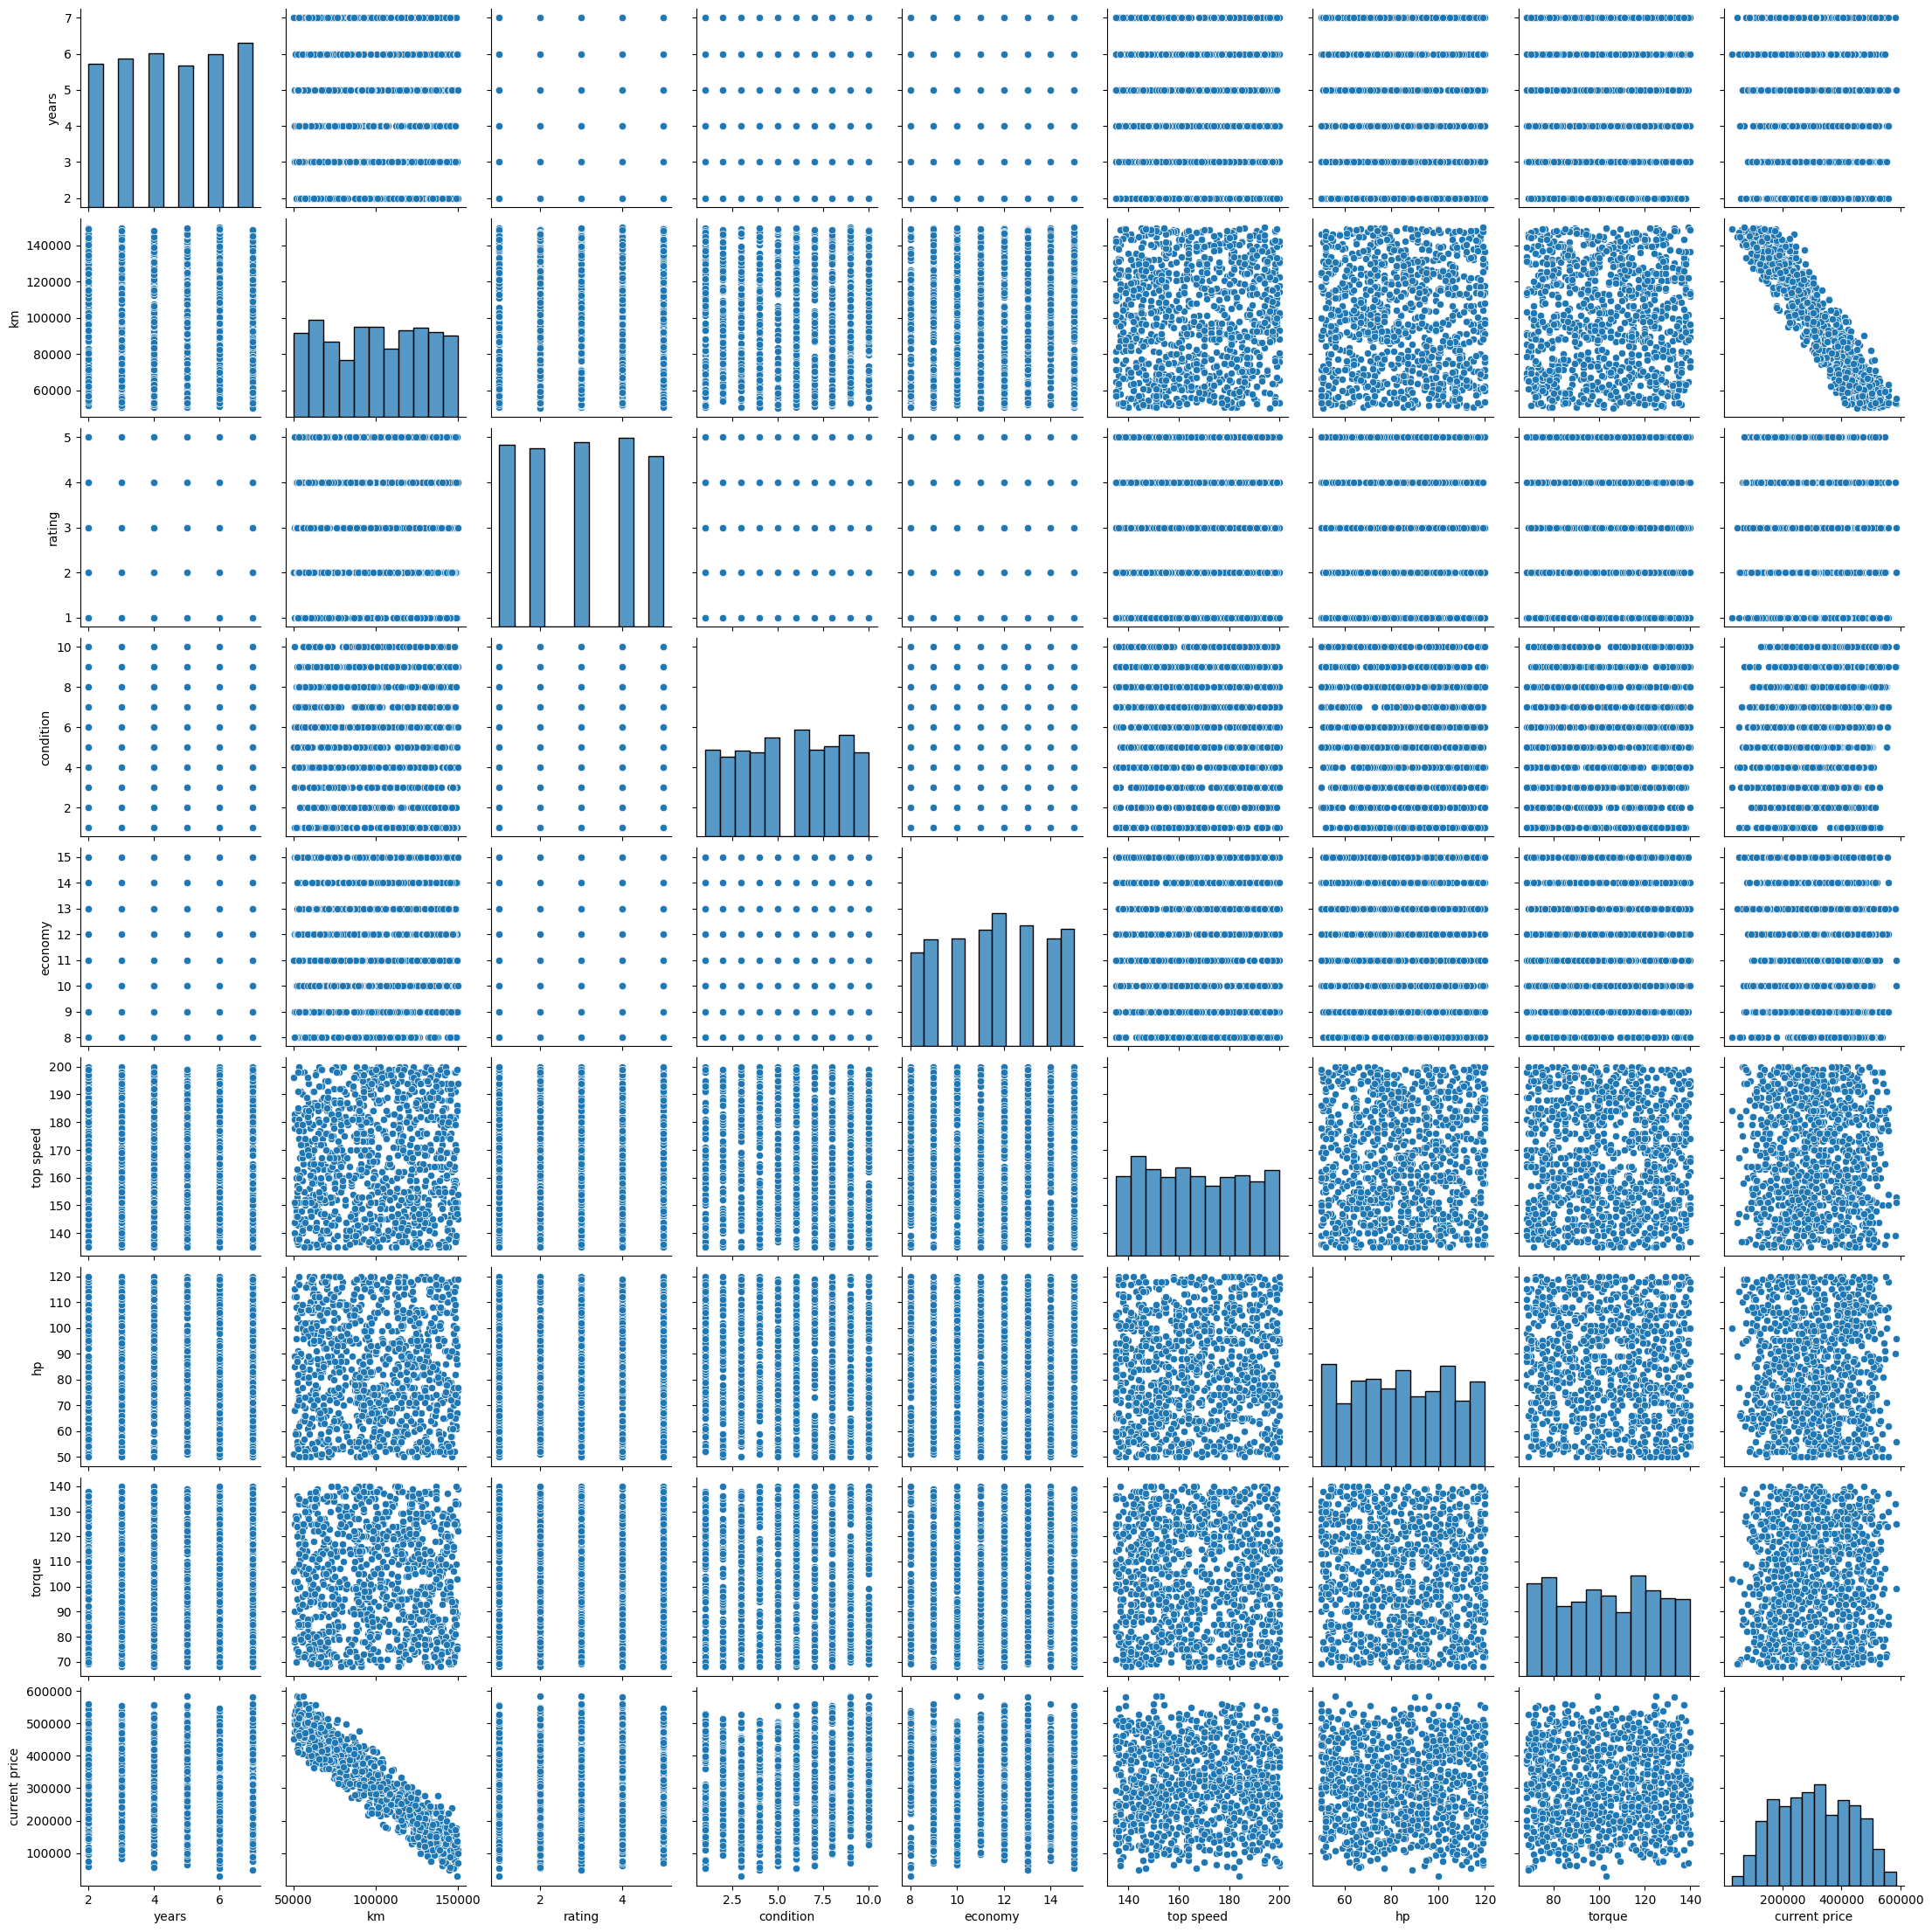

In [4]:
sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']])

In [5]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, dtype=tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)


In [6]:
print(tensor_data[:5])
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)
tf.Tensor(
[[8.480000e+02 6.383180e+05 8.659540e+05 5.000000e+00 6.861900e+04
  3.000000e+00 4.000000e+00 1.200000e+01 1.470000e+02 6.800000e+

In [7]:
x = tensor_data[:, 3:-1]
print(x[:5])

tf.Tensor(
[[5.0000e+00 6.8619e+04 3.0000e+00 4.0000e+00 1.2000e+01 1.4700e+02
  6.8000e+01 1.1800e+02]
 [2.0000e+00 6.2563e+04 2.0000e+00 4.0000e+00 1.2000e+01 1.5800e+02
  1.1000e+02 1.1800e+02]
 [2.0000e+00 6.5706e+04 4.0000e+00 1.0000e+01 8.0000e+00 1.4800e+02
  8.4000e+01 7.5000e+01]
 [5.0000e+00 6.7836e+04 4.0000e+00 1.0000e+00 8.0000e+00 1.7400e+02
  9.4000e+01 1.2100e+02]
 [3.0000e+00 5.5465e+04 2.0000e+00 3.0000e+00 1.2000e+01 1.4100e+02
  1.0000e+02 9.3000e+01]], shape=(5, 8), dtype=float32)


In [8]:
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis=-1)
print(y[:5])

tf.Tensor(
[[476969.5]
 [424781. ]
 [423507. ]
 [360737.5]
 [502519. ]], shape=(5, 1), dtype=float32)


In [9]:
normalizer = Normalization(axis=-1, mean=5, variance=4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [10]:
normalizer = Normalization()
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])
normalizer.adapt(x_normalized)
normalizer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.]], dtype=float32)>

In [11]:
normalizer = Normalization()
normalizer.adapt(x)
normalizer(x)

<tf.Tensor: shape=(1000, 8), dtype=float32, numpy=
array([[ 0.2554971 , -1.0864763 ,  0.00855854, ..., -1.031862  ,
        -0.80685896,  0.69255286],
       [-1.4904962 , -1.29433   , -0.7046625 , ..., -0.46128505,
         1.2412542 ,  0.69255286],
       [-1.4904962 , -1.1864562 ,  0.7217796 , ..., -0.97999144,
        -0.02662536, -1.3503786 ],
       ...,
       [-0.32650068, -0.7414035 ,  0.7217796 , ...,  0.6279983 ,
        -0.36797756, -0.44768798],
       [ 0.2554971 , -0.5364329 ,  0.7217796 , ...,  0.16116259,
         0.94866663, -0.6377281 ],
       [-0.90849847,  0.5598785 ,  0.00855854, ...,  0.10929194,
         0.26596224,  0.97761303]], dtype=float32)>

In [12]:
print(x[:5])

tf.Tensor(
[[5.0000e+00 6.8619e+04 3.0000e+00 4.0000e+00 1.2000e+01 1.4700e+02
  6.8000e+01 1.1800e+02]
 [2.0000e+00 6.2563e+04 2.0000e+00 4.0000e+00 1.2000e+01 1.5800e+02
  1.1000e+02 1.1800e+02]
 [2.0000e+00 6.5706e+04 4.0000e+00 1.0000e+01 8.0000e+00 1.4800e+02
  8.4000e+01 7.5000e+01]
 [5.0000e+00 6.7836e+04 4.0000e+00 1.0000e+00 8.0000e+00 1.7400e+02
  9.4000e+01 1.2100e+02]
 [3.0000e+00 5.5465e+04 2.0000e+00 3.0000e+00 1.2000e+01 1.4100e+02
  1.0000e+02 9.3000e+01]], shape=(5, 8), dtype=float32)


# LINEAR REGRESSION MODEL

In [14]:
model = tf.keras.Sequential([
                            InputLayer(input_shape=(8,)),
                            normalizer,
                            Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


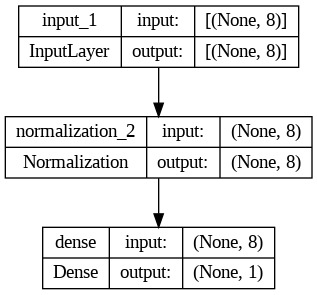

In [15]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [25]:
model.compile(optimizer=Adam(learning_rate=0.1),loss=MeanSquaredError())

# Training and optimization

In [26]:
history = model.fit(x,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 111054258176.0000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 111051554816.0000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 111048851456.0000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 111046238208.0000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 111043510272.0000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 111040856064.0000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 111038160896.0000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 111035490304.0000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 111032844288.0000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 111030173696.0000
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 111027503104.00

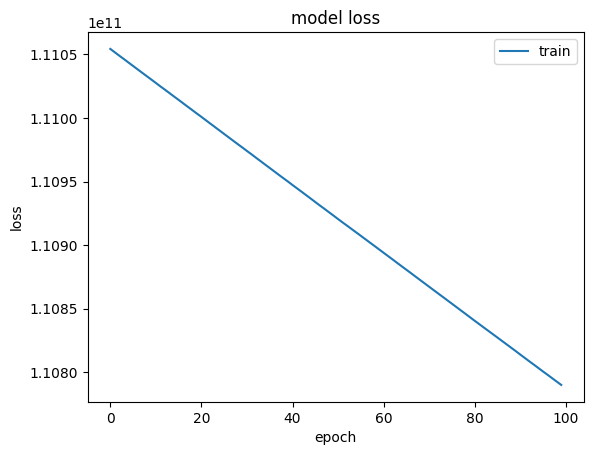

In [28]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()